Import dependencies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

/opt/homebrew/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


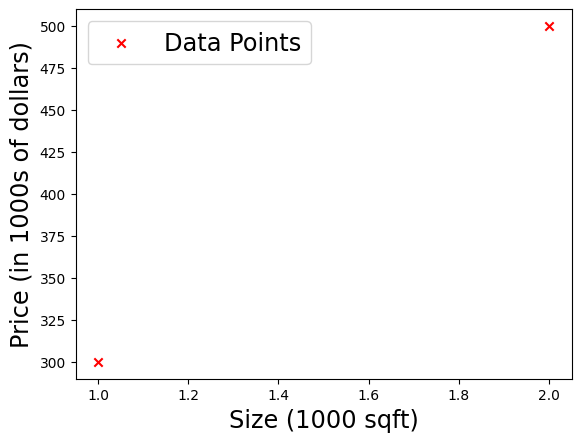

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [8]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')

If we try to print the weight, the result would be an empty array, since we did not pass the dataset.

In [5]:
linear_layer.get_weights()

[]

In [9]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.80463827]], shape=(1, 1), dtype=float32)


It is important to notice that the initial values of the weights (w, b) are randomly chosen 

In [10]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.80463827]], b=[0.]


We set the values of w and b to known values

In [13]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [14]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [27]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c='b', label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='g')
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c='b', label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='g')
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

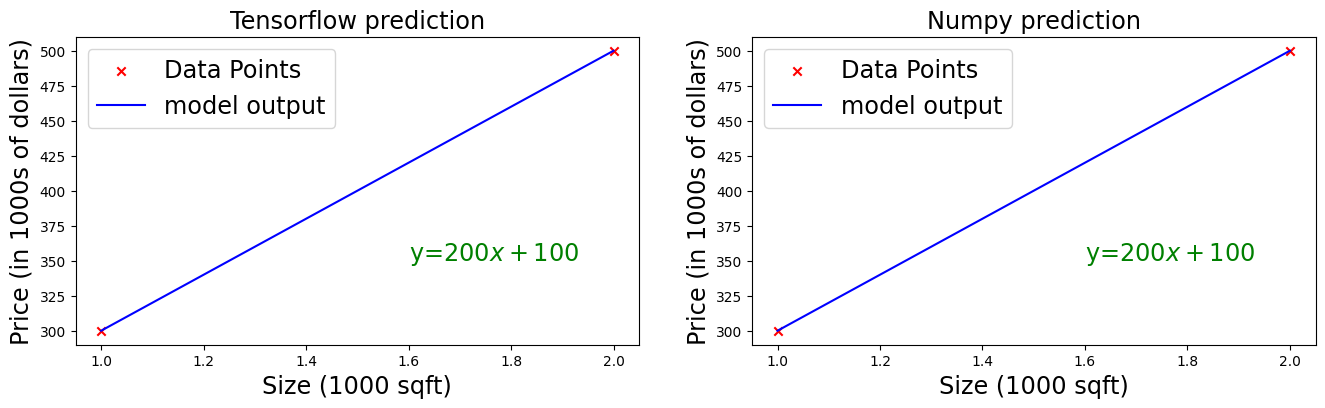

In [28]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.

Dataset

In [29]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [30]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

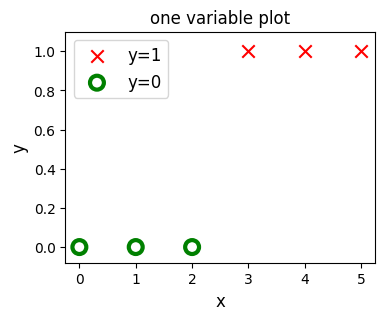

In [32]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors='g',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

## Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.


In [33]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.7581996]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [36]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [40]:
def sigmoidnp(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

In [41]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 14ms/step
[[0.01098694]]
[[0.01098694]]


In [42]:
  
def plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg):
    fig,ax = plt.subplots(1,2,figsize=(16,4))

    layerf= lambda x : model.predict(x)
    plt_prob_1d(ax[0], layerf)

    ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
                  edgecolors='b',lw=3)

    ax[0].set_ylim(-0.08,1.1)
    ax[0].set_xlim(-0.5,5.5)
    ax[0].set_ylabel('y', fontsize=16)
    ax[0].set_xlabel('x', fontsize=16)
    ax[0].set_title('Tensorflow Model', fontsize=20)
    ax[0].legend(fontsize=16)

    layerf= lambda x : sigmoidnp(np.dot(set_w,x.reshape(1,1)) + set_b)
    plt_prob_1d(ax[1], layerf)

    ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
                  edgecolors='b',lw=3)

    ax[1].set_ylim(-0.08,1.1)
    ax[1].set_xlim(-0.5,5.5)
    ax[1].set_ylabel('y', fontsize=16)
    ax[1].set_xlabel('x', fontsize=16)
    ax[1].set_title('Numpy Model', fontsize=20)
    ax[1].legend(fontsize=16)
    plt.show()

In [44]:
def plt_prob_1d(ax,fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x_space  = np.linspace(0, 5 , 50)
    y_space  = np.linspace(0, 1 , 50)

    # get probability for x range, extend to y
    z = np.zeros((len(x_space),len(y_space)))
    for i in range(len(x_space)):
        x = np.array([[x_space[i]]])
        z[:,i] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(x_space, y_space, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

In [46]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [50]:
import matplotlib.colors as colors
from matplotlib import cm


1/1 [==============================] - 0s 12ms/step


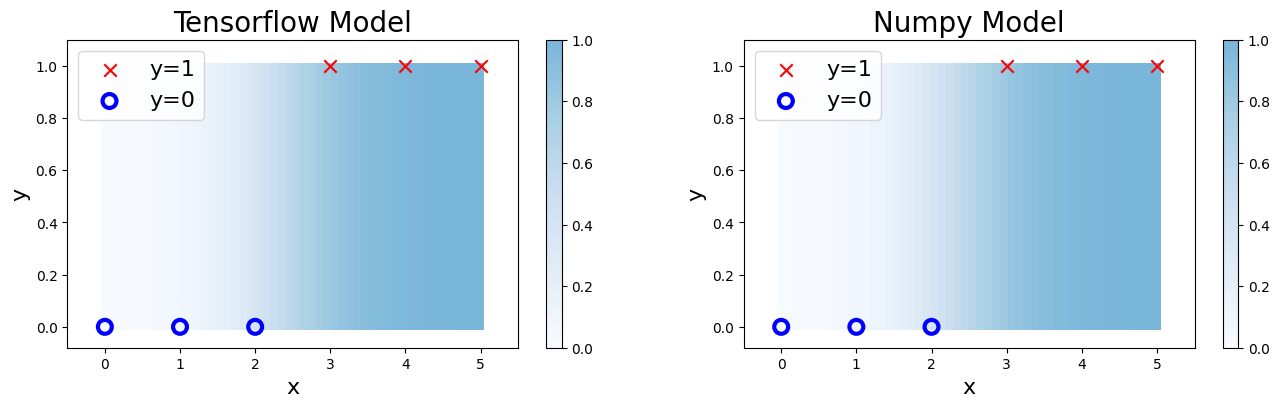

In [51]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)